In [1]:
import numpy as np
import skimage as sk
import skimage.io as skio
import cv2 
from scipy import signal
import scipy
from skimage import color
import math
import matplotlib
from matplotlib import pyplot as plt
%matplotlib qt
import sys
sys.path.insert(1, 'hybrid_python')
from align_image_code import align_images
%pylab inline


Populating the interactive namespace from numpy and matplotlib


### Part 1.1 Finite Difference Operator

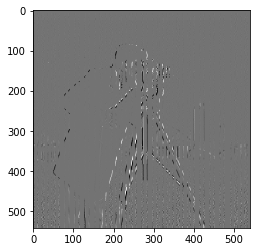

In [2]:
name = 'cameraman.png'
im = color.rgb2gray(skio.imread(name)) #convert to grayscale image
im = sk.img_as_float(im)

dx = np.array([1, -1]).reshape(1, 2)
dy = np.array([1, -1]).reshape(2, 1)

im_x = signal.convolve2d(im, dx, "same")
im_y = signal.convolve2d(im, dy, "same")
im_out = np.sqrt(im_x**2 + im_y**2)
im_out[im_out < 0.15] = 0
im_out[im_out>=0.15] = 1
imshow(im_x,  cmap='gray')
plt.imsave("./Part1/dx.jpg", im_x, cmap='gray')

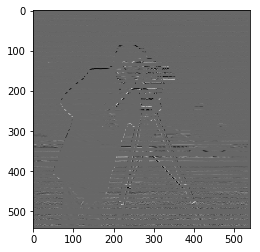

In [3]:
imshow(im_y, cmap='gray')
plt.imsave("./Part1/dy.jpg", im_y, cmap='gray')

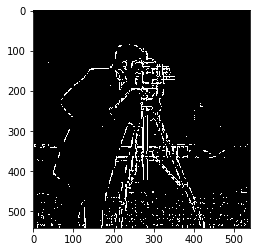

In [4]:
imshow(im_out, cmap='gray')
plt.imsave("./Part1/dxdy.jpg", im_out, cmap='gray')

### Part1.2 Derivative of Gaussian Filter

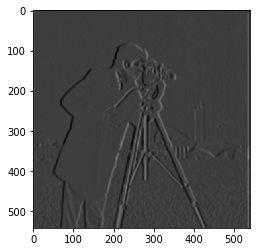

In [5]:
def gaussian_filter(im):
    gaussian = cv2.getGaussianKernel(8, 2) 
    gaussian_2d = np.outer(gaussian, gaussian.T)

    im_gaussian = signal.convolve2d(im, gaussian_2d, "same")
    im_x = signal.convolve2d(im_gaussian, dx, "same")
    im_y = signal.convolve2d(im_gaussian, dy, "same")
    return im_x, im_y

im_x, im_y = gaussian_filter(im)
im_out = sqrt(im_x**2 + im_y**2)
im_out[im_out < 0.05] = 0
im_out[im_out>=0.05] = 1
imshow(im_x,  cmap='gray')
plt.imsave("./Part1/gaussian_dx.jpg", im_x, cmap='gray')

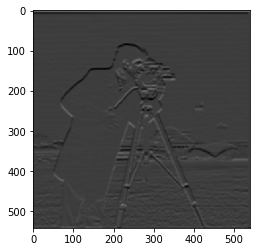

In [6]:
imshow(im_y, cmap='gray')
plt.imsave("./Part1/gaussian_dy.jpg", im_y, cmap='gray')

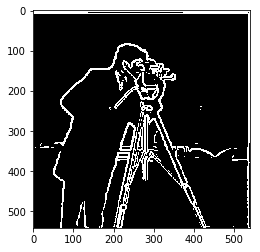

In [7]:
imshow(im_out, cmap='gray')
plt.imsave("./Part1/gaussian_dxdy.jpg", im_out, cmap='gray')

We can see that the noises are removed after filtering with Gaussian

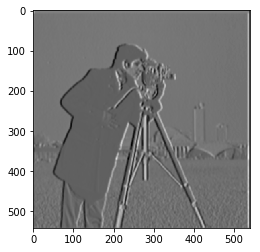

In [8]:
#Check Results
im = color.rgb2gray(imread(name))
im = sk.img_as_float(im)
gaussian = cv2.getGaussianKernel(8, 2) 
gaussian_2d = np.outer(gaussian, gaussian.T)
    
im_gau_x = signal.convolve2d(gaussian_2d, dx, "same")
im_gau_y = signal.convolve2d(gaussian_2d, dy, "same")
im_x = signal.convolve2d(im, im_gau_x, "same")
im_y = signal.convolve2d(im, im_gau_y, "same")
im_out = sqrt(im_x**2 + im_y**2)

im_out[im_out < 0.06] = 0
im_out[im_out>=0.06] = 1
imshow(im_x, cmap='gray')
plt.imsave("./Part1/check_dx.jpg", im_x, cmap='gray')

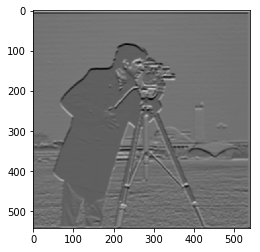

In [9]:
imshow(im_y, cmap='gray')
plt.imsave("./Part1/check_dy.jpg", im_y, cmap='gray')

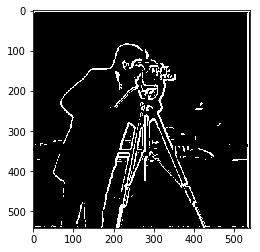

In [10]:
imshow(im_out, cmap='gray')
plt.imsave("./Part1/check_dxdy.jpg", im_out, cmap='gray')

### Part1.3 Image Straightening

In [11]:
name = 'facade.jpg'
im = color.rgb2gray(imread(name)) #convert to grayscale image
im = sk.img_as_float(im)


In [32]:
def rotate(im):
    angles = np.arange(-10, 10, 1)
    dx = np.array([1, -1]).reshape(1, 2)
    dy = np.array([1, -1]).reshape(2, 1)

    max_aligned = 0
    best_angle = None
    for angle in angles:
        im_rotate = scipy.ndimage.interpolation.rotate(im, angle)
        shape = (im_rotate.shape[0], im_rotate.shape[1])
        im_rotate = im_rotate[int(shape[0]/2) - int(0.2*shape[0]) : int(shape[0]/2) + int(0.2*shape[0]), \
                              int(shape[1]/2) - int(0.2*shape[1]) : int(shape[1]/2) + int(0.2*shape[1])]

        im_x, im_y = gaussian_filter(im_rotate)
        im_x= im_x.reshape(-1)
        im_y= im_y.reshape(-1)
        grad_angle = np.rad2deg(np.arctan2(im_y, im_x))

#         total = sum([1 for i in grad_angle if (abs(i) < 91 and abs(i) > 89) or (abs(i) < 1)]) / len(grad_angle)
        total = (len(np.where(abs(grad_angle - 90) < 1)[0]) + len(np.where(abs(grad_angle - 0) < 1)[0]) + len(np.where(abs(grad_angle - 180) < 1)[0])) / len(grad_angle)
#         print(total)
        if max_aligned < total:
            max_aligned = total
            best_angle = angle
    print("best angle: ", best_angle)
    return best_angle

def histogram(im, angle):
    im_rotate_best = scipy.ndimage.interpolation.rotate(im, angle)
    im_x = signal.convolve2d(im_rotate_best, dx, "same")
    im_y = signal.convolve2d(im_rotate_best, dy, "same")
    grad_angle = np.rad2deg(np.arctan2(im_y, im_x)).reshape(-1)
    plt.hist(grad_angle, density=True, bins=18);
    plt.savefig("./Part1/pisa_0degree.jpg")

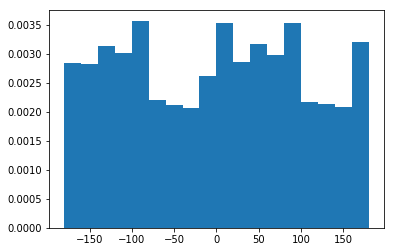

In [14]:
#Histogram of original image
histogram(im, 0)

best angle:  -3


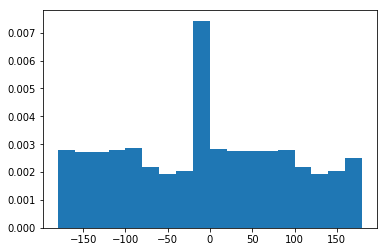

In [16]:
#Histogram of best rotated image
best_angle = rotate(im)
histogram(im, best_angle)

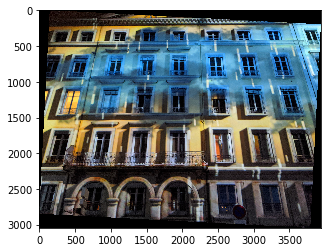

In [17]:
#Show rotated image
name = 'facade.jpg'
im = imread(name) 
im = sk.img_as_float(im)
im_rotate_best = scipy.ndimage.interpolation.rotate(im, best_angle)
im_rotate_best[im_rotate_best > 1] = 1
im_rotate_best[im_rotate_best < 0] = 0
imshow(im_rotate_best)
plt.imsave("./Part1/facade_rotate.jpg", im_rotate_best)

best angle:  -5


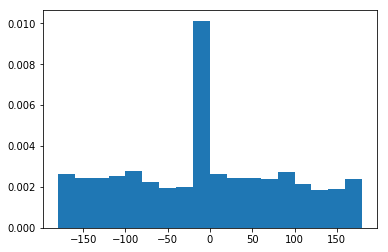

In [21]:
#Show Reault on 3 more images: 
name = 'giraffe.jpg'
im_gray = color.rgb2gray(imread(name)) #convert to grayscale image
im_gray = sk.img_as_float(im_gray)
best_angle = rotate(im_gray)
histogram(im_gray, best_angle)

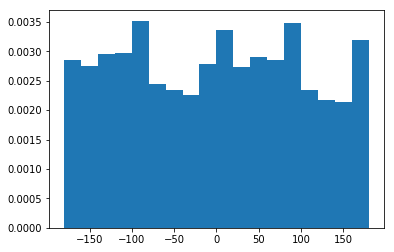

In [23]:
histogram(im_gray, 0)

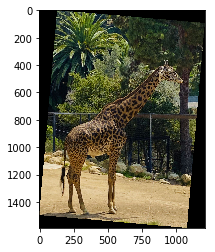

In [24]:
im = imread(name) 
im = sk.img_as_float(im)
im_rotate_best = scipy.ndimage.interpolation.rotate(im, best_angle)
im_rotate_best[im_rotate_best > 1] = 1
im_rotate_best[im_rotate_best < 0] = 0
imshow(im_rotate_best)
plt.imsave("./Part1/giraffe_rotate.jpg", im_rotate_best)

best angle:  0


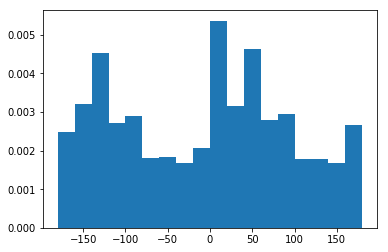

In [26]:
name = 'lady.jpg'
im_gray = color.rgb2gray(imread(name)) #convert to grayscale image
im_gray = sk.img_as_float(im_gray)
best_angle = rotate(im_gray)
histogram(im_gray, best_angle)

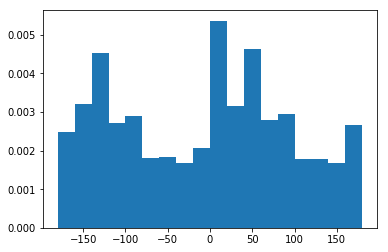

In [28]:
histogram(im_gray, 0)

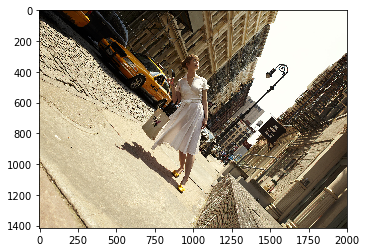

In [29]:
im = imread(name) 
im = sk.img_as_float(im)
im_rotate_best = scipy.ndimage.interpolation.rotate(im, best_angle)
im_rotate_best[im_rotate_best > 1] = 1
im_rotate_best[im_rotate_best < 0] = 0
imshow(im_rotate_best)
plt.imsave("./Part1/lady_rotate.jpg", im_rotate_best)

best angle:  5


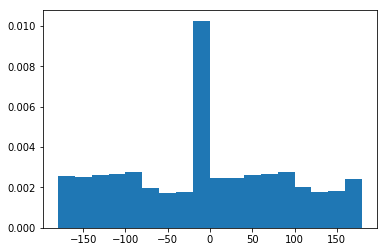

In [31]:
name = 'pisa.jpg'
im_gray = color.rgb2gray(imread(name)) #convert to grayscale image
im_gray = sk.img_as_float(im_gray)
best_angle = rotate(im_gray)
histogram(im_gray, best_angle)

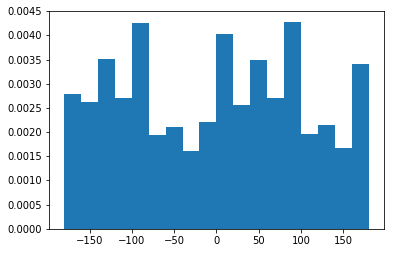

In [33]:
histogram(im_gray, 0)

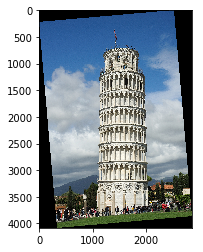

In [34]:
im = imread(name) 
im = sk.img_as_float(im)
im_rotate_best = scipy.ndimage.interpolation.rotate(im, best_angle)
im_rotate_best[im_rotate_best > 1] = 1
im_rotate_best[im_rotate_best < 0] = 0
imshow(im_rotate_best)
plt.imsave("./Part1/pisa_rotate.jpg", im_rotate_best)

### Part 2.1 Image Sharpening

In [40]:
def unsharp_mask_filter(im, alpha=0.8):
    
    gaussian = cv2.getGaussianKernel(8, 2) 
    gaussian_2d = np.outer(gaussian, gaussian.T)
    filters = (1 + alpha) * signal.unit_impulse((8, 8), 'mid') - alpha * gaussian_2d
    im_out = signal.convolve2d(im, filters, "same")

    return im_out

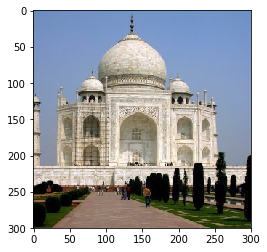

In [41]:
name = './Part2/taj.jpg'
im = imread(name) 
im = sk.img_as_float(im)
imshow(im)

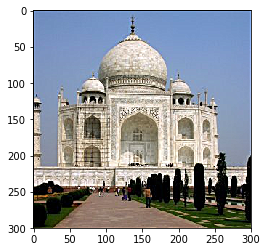

In [42]:
im_sharp = np.zeros(im.shape)
for i in range(3):
    im_sharp[:,:,i] = unsharp_mask_filter(im[:,:,i])
im_sharp = np.clip(im_sharp, 0, 1)
imshow(im_sharp)
plt.imsave("./Part2/taj_sharpen.jpg", im_sharp)

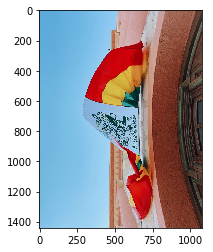

In [43]:
name = './Part2/flag.jpg'
im_gray = color.rgb2gray(imread(name)) #convert to grayscale image
im_gray = sk.img_as_float(im_gray)
im = imread(name) 
im = sk.img_as_float(im)
imshow(im)

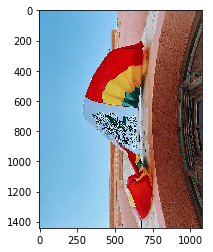

In [44]:
im_sharp = np.zeros(im.shape)
for i in range(3):
    im_sharp[:,:,i] = unsharp_mask_filter(im[:,:,i])
im_sharp = np.clip(im_sharp, 0, 1)
imshow(im_sharp)
plt.imsave("./Part2/flag_sharpen.jpg", im_sharp)

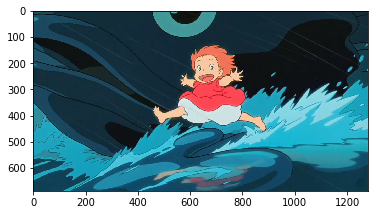

In [273]:
#Validate Result
name = './Part2/ponyo.jpg'
im_gray = color.rgb2gray(imread(name)) #convert to grayscale image
im_gray = sk.img_as_float(im_gray)
im = imread(name) 
im = sk.img_as_float(im)
plt.imshow(im, cmap='gray')


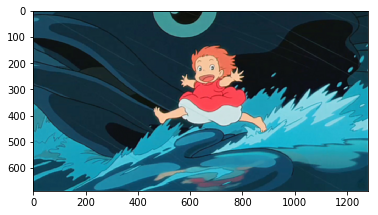

In [277]:
#first blur it, then sharpen it
gaussian = cv2.getGaussianKernel(8, 2) 
gaussian_2d = np.outer(gaussian, gaussian.T)
im_blur = np.zeros(im.shape)
for i in range(3):
    blur = signal.convolve2d(im[:,:,i], gaussian_2d, "same")
    im_blur[:,:,i] = unsharp_mask_filter(blur)
im_blur = np.clip(im_blur, 0, 1)
imshow(im_blur)
plt.imsave("./Part2/ponyo_blur.jpg", im_blur)

From the result of first blur then sharpen the image, we can see that it is not actually sharpened to its original state. Since our sharpening method only makes it looks sharper by visual effect, it doesn't actually add information to the image. 

### Part 2.2

The hybrid part of the code is in python files, the frequency analysis part is below

In [28]:
name = './hybrid_python/trump.jpg'
im_gray = color.rgb2gray(imread(name)) 
im_gray = sk.img_as_float(im_gray)
im_out = np.log(np.abs(np.fft.fftshift(np.fft.fft2(im_gray))))
imsave("./hybrid_python/trump_fft.jpg", im_out)

In [30]:
name = './hybrid_python/thanos.jpg'
im_gray = color.rgb2gray(imread(name)) 
im_gray = sk.img_as_float(im_gray)
im_out = np.log(np.abs(np.fft.fftshift(np.fft.fft2(im_gray))))
imsave("./hybrid_python/thanos_fft.jpg", im_out)

In [31]:
name = './hybrid_python/hybrid_trump_gray.jpg'
im_gray = color.rgb2gray(imread(name)) 
im_gray = sk.img_as_float(im_gray)
im_out = np.log(np.abs(np.fft.fftshift(np.fft.fft2(im_gray))))
imsave("./hybrid_python/hybrid_fft.jpg", im_out)

In [32]:
name = './hybrid_python/high_frequency.jpg'
im_gray = color.rgb2gray(imread(name)) 
im_gray = sk.img_as_float(im_gray)
im_out = np.log(np.abs(np.fft.fftshift(np.fft.fft2(im_gray))))
imsave("./hybrid_python/filter_trump_fft.jpg", im_out)

In [33]:
name = './hybrid_python/low_frequency.jpg'
im_gray = color.rgb2gray(imread(name)) 
im_gray = sk.img_as_float(im_gray)
im_out = np.log(np.abs(np.fft.fftshift(np.fft.fft2(im_gray))))
imsave("./hybrid_python/filter_thanos_fft.jpg", im_out)

### Part 2.3

In [82]:
# def pyramid(im, name, gray=True):
#     gaussian = cv2.getGaussianKernel(40, 6) 
#     gaussian_2d = np.outer(gaussian, gaussian.T)


#     low_images = []
#     high_images = []
#     if not gray:
#         low_images.append(im)
#         plt.imsave("./stack/" + name + "_low_0.jpg", im, cmap='gray')
#         im_low = im
#     else:
#         low_images.append(color.rgb2gray(im))
#         plt.imsave("./stack/" + name + "_low_0.jpg", color.rgb2gray(im), cmap='gray')
#         im_low = color.rgb2gray(im)

#     for i in range(5):
#         if not gray:
#             for j in range(3):  
#                 im_low[:,:,j] = signal.convolve2d(im_low[:,:,j], gaussian_2d, "same")
#             im_low = im_low / np.amax(im_low)
#         else:
#             im_low = signal.convolve2d(im_low, gaussian_2d, "same")
#         low_images.append(im_low)
#         print(len(low_images))
#         plt.imsave("./stack/" + name + "_low_" + str(i + 1) + ".jpg", im_low, cmap='gray')

#     for i in range(len(low_images) - 1):
# #         if not gray:
# #             im_high = np.zeros(low_images[0].shape)
# #             for j in range(3):  
# #                 im_high[:,:,j] = low_images[i][:,:,j] - low_images[i + 1][:,:,j]
# # #             im_high = im_high / np.amax(im_high)
#         im_high = (low_images[i] -  low_images[i + 1])
#         if not gray:
#             im_high = im_high / np.amax(im_high)
#             im_high = np.clip(im_high, 0, 1)
#         high_images.append(im_high)
#         plt.imsave("./stack/" + name + "_high_" + str(i) + ".jpg", im_high, cmap='gray')
#     return low_images, high_images
        



In [246]:
def pyramid(im, name, gray=True):
    gaussian = cv2.getGaussianKernel(8, 3) 
    gaussian_2d = np.outer(gaussian, gaussian.T)
    low_images = []
    high_images = []
    
    if not gray:
                
        r, g, b = im[:,:,0], im[:,:,1], im[:,:,2]

        for i in range(5):
            r = signal.convolve2d(r, gaussian_2d, "same")
            g = signal.convolve2d(g, gaussian_2d, "same")
            b = signal.convolve2d(b, gaussian_2d, "same")
            
            low_images.append([r, g, b])
#             plt.imsave("./stack/" + name + "_low_" + str(i + 1) + ".jpg", np.dstack([r,g,b]), cmap='gray')

        for i in range(len(low_images) - 1):
            r = low_images[i][0] - low_images[i + 1][0]
            g = low_images[i][1] - low_images[i + 1][1]
            b = low_images[i][2] - low_images[i + 1][2]
                        
            high_images.append([r, g, b])
#             plt.imsave("./stack/" + name + "_high_r_" + str(i + 1) + ".jpg", r, cmap='gray')
    
    
    
    
    else:
        low_images.append(color.rgb2gray(im))
        plt.imsave("./stack/" + name + "_low_0.jpg", color.rgb2gray(im), cmap='gray')
        im_low = color.rgb2gray(im)
        
        for i in range(4):
            im_low = signal.convolve2d(im_low, gaussian_2d, "same")
        low_images.append(im_low)
        plt.imsave("./stack/" + name + "_low_" + str(i + 1) + ".jpg", im_low, cmap='gray')

        for i in range(len(low_images) - 1):
            im_high = (low_images[i] -  low_images[i + 1])
            high_images.append(im_high)
            plt.imsave("./stack/" + name + "_high_" + str(i) + ".jpg", im_high, cmap='gray')

    
    return low_images, high_images
        



([array([[0.07846196, 0.07846196, 0.08238353, ..., 0.06329647, 0.07506118,
          0.08290431],
         [0.08238353, 0.0863051 , 0.09022667, ..., 0.06329647, 0.07506118,
          0.08682588],
         [0.07061882, 0.07454039, 0.07846196, ..., 0.06721804, 0.07898275,
          0.08682588],
         ...,
         [0.24470392, 0.25254706, 0.26179686, ..., 0.65462431, 0.68593725,
          0.69066941],
         [0.24078235, 0.24078235, 0.24218902, ..., 0.65013725, 0.68537176,
          0.68898784],
         [0.24470392, 0.23293922, 0.22650275, ..., 0.66637412, 0.69740431,
          0.70018706]]),
  array([[0.0046879 , 0.00637372, 0.00817964, ..., 0.0106393 , 0.00902323,
          0.00727051],
         [0.00642199, 0.00873228, 0.01120785, ..., 0.01456919, 0.01235434,
          0.00995335],
         [0.00831793, 0.01131166, 0.01452066, ..., 0.01886002, 0.01598994,
          0.01288048],
         ...,
         [0.04011453, 0.05464116, 0.07027153, ..., 0.14139694, 0.12434664,
          0.1

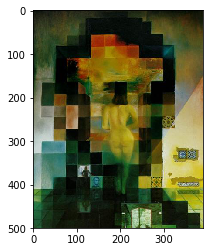

In [184]:
name = 'lincoln.jpg'
im = imread(name) 
im = sk.img_as_float(im)
imshow(im)
pyramid(im, "lincoln", gray)

C:\Users\wangkehua\Anaconda3\envs\booknlp\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


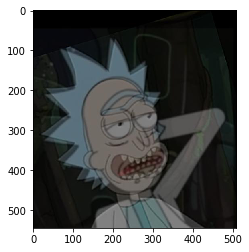

In [230]:
name = './hybrid_python/hybrid_rick.jpg'
im = imread(name) 
im = sk.img_as_float(im)
imshow(im)
pyramid(im, "rick")

### Part 2.4

In [278]:
name = './spline/apple.jpeg'
im_apple = imread(name) 
im_apple = sk.img_as_float(im_apple)

name = './spline/orange.jpeg'
im_orange = imread(name) 
im_orange = sk.img_as_float(im_orange)

apple_low, apple_high = pyramid(im_apple, "apple", False)
orange_low, orange_high = pyramid(im_orange, "orange", False)

mask = np.zeros(im_apple.shape)
length = im_apple.shape[1]
mask[:,:int(length / 2),:] = 1
mask_low, _ = pyramid(mask, "mask_oranple", False)


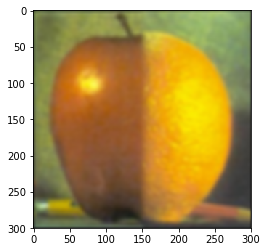

In [280]:
r, g, b = 0, 0, 0
for i in range(len(apple_high)):
    r += np.multiply(apple_high[i][0], mask_low[i][0]) + np.multiply(1 -  mask_low[i][0], orange_high[i][0])
    g += np.multiply(apple_high[i][1], mask_low[i][1]) + np.multiply(1 -  mask_low[i][1], orange_high[i][1])
    b += np.multiply(apple_high[i][2], mask_low[i][2]) + np.multiply(1 -  mask_low[i][2], orange_high[i][2])
    plt.imsave("./stack/"  + "oranple_" + str(i) + ".jpg", r, cmap='gray')


r += np.multiply(apple_low[-1][0], mask_low[-1][0]) + np.multiply(1 -  mask_low[-1][0], orange_low[-1][0])
g += np.multiply(apple_low[-1][1], mask_low[-1][1]) + np.multiply(1 -  mask_low[-1][1], orange_low[-1][1])
b += np.multiply(apple_low[-1][2], mask_low[-1][2]) + np.multiply(1 -  mask_low[-1][2], orange_low[-1][2])

im_out = np.clip(np.dstack([r, g, b]), 0, 1)

imshow(im_out)
plt.imsave("./stack/oranple.jpg", im_out)

In [243]:
name = './spline/eye2.jpg'
im_boy= imread(name) 
im_boy = sk.img_as_float(im_boy)

name = './spline/eye11.jpg'
im_girl = imread(name) 
im_girl = sk.img_as_float(im_girl)

boy_low, boy_high = pyramid(im_boy, "boy", False)
girl_low, girl_high = pyramid(im_girl, "girl", False)

mask = np.zeros(im_boy.shape)
length = im_boy.shape[1]
mask[:,:int(length / 2),:] = 1
mask_low, _ = pyramid(mask, "mask_eyes", False)

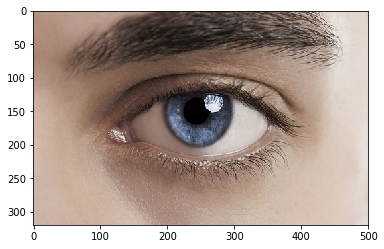

In [238]:
imshow(im_boy)

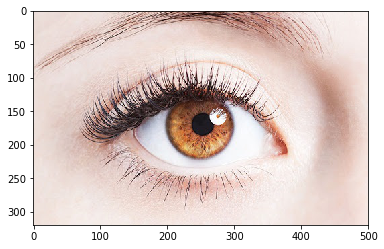

In [244]:
imshow(im_girl)

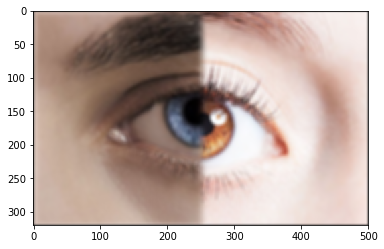

In [245]:
r, g, b = 0, 0, 0
for i in range(len(apple_high)):
    r += np.multiply(boy_high[i][0], mask_low[i][0]) + np.multiply(1 -  mask_low[i][0], girl_high[i][0])
    g += np.multiply(boy_high[i][1], mask_low[i][1]) + np.multiply(1 -  mask_low[i][1], girl_high[i][1])
    b += np.multiply(boy_high[i][2], mask_low[i][2]) + np.multiply(1 -  mask_low[i][2], girl_high[i][2])


r += np.multiply(boy_low[-1][0], mask_low[-1][0]) + np.multiply(1 -  mask_low[-1][0], girl_low[-1][0])
g += np.multiply(boy_low[-1][1], mask_low[-1][1]) + np.multiply(1 -  mask_low[-1][1], girl_low[-1][1])
b += np.multiply(boy_low[-1][2], mask_low[-1][2]) + np.multiply(1 -  mask_low[-1][2], girl_low[-1][2])

im_out = np.clip(np.dstack([r, g, b]), 0, 1)

imshow(im_out)
plt.imsave("./stack/eyes_blend.jpg", im_out)

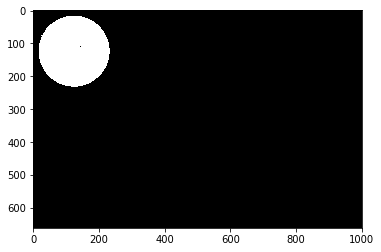

In [266]:
name = './spline/moon.jpg'
im_boy= imread(name) 
im_boy = sk.img_as_float(im_boy)

name = './spline/mountain.jpg'
im_girl = imread(name) 
im_girl = sk.img_as_float(im_girl)

boy_low, boy_high = pyramid(im_boy, "moon", False)
girl_low, girl_high = pyramid(im_girl, "mountain", False)

mask = np.zeros(im_boy.shape)
mask[im_boy > 0.02] = 1
imshow(mask)
imsave("./stack/irregular_mask.jpg", mask)
mask_low, _ = pyramid(mask, "night_blend", False)

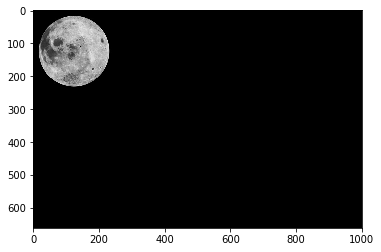

In [258]:
imshow(im_boy)

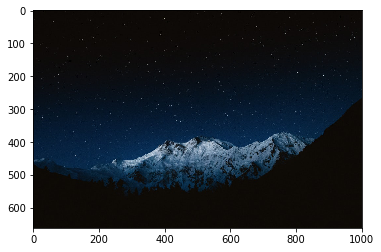

In [259]:
imshow(im_girl)

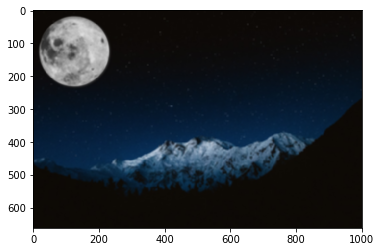

In [267]:
r, g, b = 0, 0, 0
for i in range(len(apple_high)):
    r += np.multiply(boy_high[i][0], mask_low[i][0]) + np.multiply(1 -  mask_low[i][0], girl_high[i][0])
    g += np.multiply(boy_high[i][1], mask_low[i][1]) + np.multiply(1 -  mask_low[i][1], girl_high[i][1])
    b += np.multiply(boy_high[i][2], mask_low[i][2]) + np.multiply(1 -  mask_low[i][2], girl_high[i][2])


r += np.multiply(boy_low[-1][0], mask_low[-1][0]) + np.multiply(1 -  mask_low[-1][0], girl_low[-1][0])
g += np.multiply(boy_low[-1][1], mask_low[-1][1]) + np.multiply(1 -  mask_low[-1][1], girl_low[-1][1])
b += np.multiply(boy_low[-1][2], mask_low[-1][2]) + np.multiply(1 -  mask_low[-1][2], girl_low[-1][2])

im_out = np.clip(np.dstack([r, g, b]), 0, 1)

imshow(im_out)
plt.imsave("./stack/sky_blend.jpg", im_out)